<a href="https://colab.research.google.com/github/rohanmandhanya/DataScience-on-colab/blob/master/Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Some libraries


*   Numpy
*   Pandas
*   Decision tree from Scikit learn





This below cell is used to connect your Google drive with Colab. <br>So you can access the drive for read, write and store

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from google.colab import files
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
from time import time
from google.colab import files

In [0]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

Download the CSV file and saving into drug2000.csv

In [196]:
!wget -O drug200.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv

--2020-02-23 08:02:22--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6027 (5.9K) [text/csv]
Saving to: ‘drug200.csv’

drug200.csv         100%[===================>]   5.89K  --.-KB/s    in 0s      

2020-02-23 08:02:22 (1.51 GB/s) - ‘drug200.csv’ saved [6027/6027]



Reading CSV using Pandas

In [197]:
my_data = pd.read_csv("drug200.csv", delimiter=",")
my_data.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


Basic Data information

In [198]:
my_data.shape

(200, 6)

In [199]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
Age            200 non-null int64
Sex            200 non-null object
BP             200 non-null object
Cholesterol    200 non-null object
Na_to_K        200 non-null float64
Drug           200 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


Checking types of catergories in Categorical variables

In [200]:
print(my_data["Cholesterol"].unique())
print(my_data["Sex"].unique())
print(my_data["BP"].unique())

['HIGH' 'NORMAL']
['F' 'M']
['HIGH' 'LOW' 'NORMAL']


In [201]:
my_data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


Data Preprocessing

> Importing preprocessing from Scikit Learn



In [0]:
from sklearn import preprocessing

Remove the target variable from the training set

In [203]:
X = my_data.drop(columns=['Drug']).values
X[1:5]

array([[47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.113999999999999],
       [28, 'F', 'NORMAL', 'HIGH', 7.797999999999999],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [204]:
y = my_data["Drug"]
y.head()

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

Decision tree can't handle the categorical variables.<br>
Encoding those variables into numerical data using **Sci-kit preproccessing**(*Label Encoder*) using Fit and Transform

In [205]:
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999],
       [61, 0, 1, 0, 18.043]], dtype=object)

Split Data into **Train** & **Test** dataset for K cross Validation <br>

The train_test_split will need the parameters: <br>
X, y, test_size=0.3, and random_state=3 where test_size defines size for test set and random state make sure same splits 

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

# Modeling and training

Creating Decision Tree classifier instance. <br>
The Classifier, specify criterion="entropy" so we can see the information gain of each node with a pruning defined using max_depth of 4

In [208]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 2)
drugTree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Training using X_trainset and y_trainset on Sci-kit DecisionTreeClassifier

In [209]:
t1=time()
drugTree.fit(X_trainset,y_trainset)
print("training time:", round(time()-t1, 3), "s")

training time: 0.003 s


Prediction on Test Dataset and storing the result into a csv file

In [0]:
prediction = pd.DataFrame(columns=["target"])

In [211]:
## Storing into a DataFrame to save it into CSV file
prediction["target"] = drugTree.predict(X_testset)
## Other way to store prediction is array which is basic out of predict method
predTree = drugTree.predict(X_testset)
predTree[:5]

array(['drugY', 'drugX', 'drugX', 'drugX', 'drugX'], dtype=object)

In [0]:
prediction.to_csv("results.csv")

### Evaluation

In [213]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.8166666666666667


## Visualization

In [0]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn import tree
%matplotlib inline

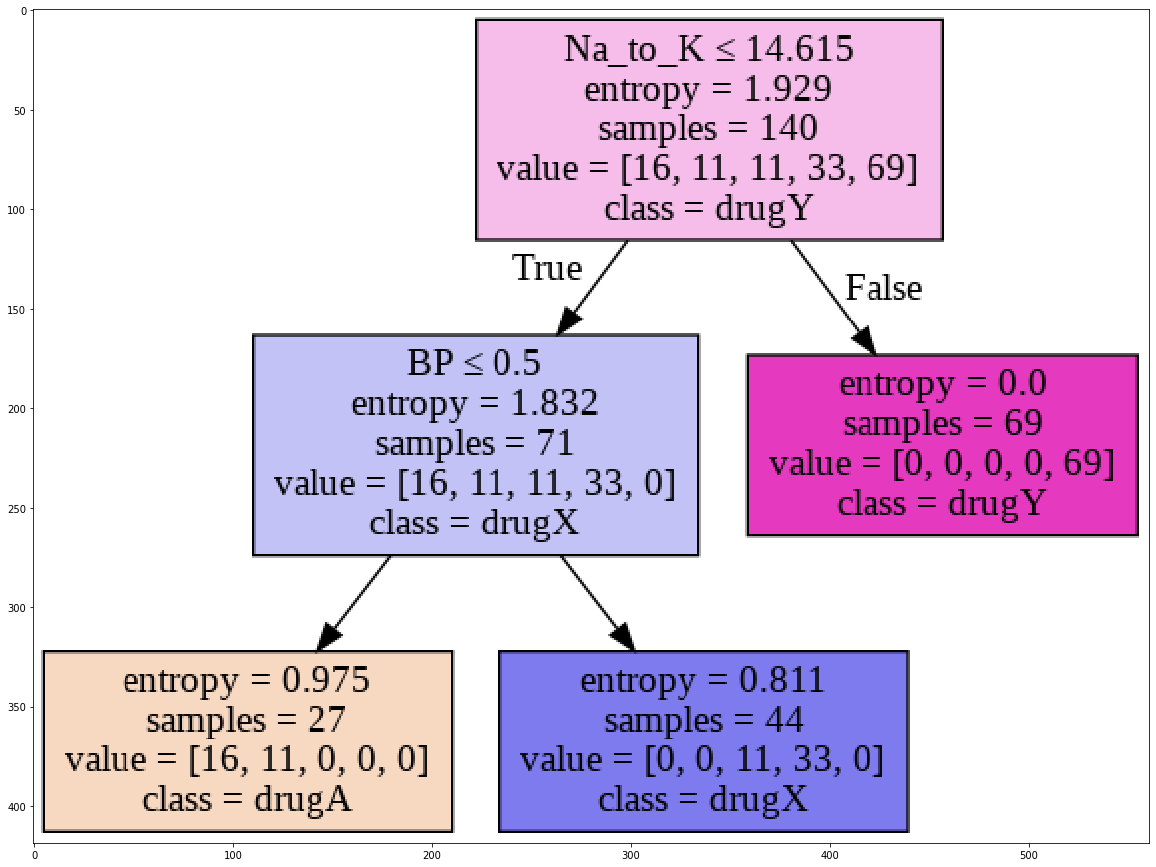

In [216]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = my_data.columns[0:5]
targetNames = my_data["Drug"].unique().tolist()
out=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(20, 50))
plt.imshow(img,interpolation='nearest')

This is used to save the data in your drive directly

***I use the datasets folder to store my results***

In [0]:
file_list = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()
for file1 in file_list:
  if (file1['title'] == "datasets"):
    id = (file1['id'])

In [0]:
file = drive.CreateFile({'parents':[{u'id': id}]}) 
file.SetContentFile("results.csv")
file.Upload()